In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [17]:
results = pd.read_csv("../results/baseline_acc.csv", header=0, index_col=0)

In [18]:
def plot_graphics(dataframe: pd.DataFrame, column_name: str, width=0.3):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
    fig.suptitle(column_name)
    x_tick = []
    y_tick = []
    for unique_elem in np.unique(dataframe[column_name]):
        x_tick.append(str(unique_elem))
        y_tick.append(dataframe[dataframe[column_name] == unique_elem].mean(axis=0))
    x = np.arange(len(y_tick))
    
    f1_argmax = x_tick[np.argmax([y["f1_test"] for y in y_tick])]
    axs[0].bar(x - width/2, [y["f1_test"] for y in y_tick], width, label="На тестовій вибірці", color="green")
    axs[0].bar(x + width/2,[y["f1_train"] for y in y_tick], width, label="На тренувальній вибірці", color="orange")
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(x_tick)
    axs[0].legend()
    axs[0].set_title(f"F1-міра (Найкращий параметр : {f1_argmax})")
    
    acc_argmax = x_tick[np.argmax([y["accuracy_test"] for y in y_tick])]
    axs[1].bar(x - width/2, [y["accuracy_test"] for y in y_tick], width, label="На тестовій вибірці", color="green")
    axs[1].bar(x + width/2,[y["accuracy_train"] for y in y_tick], width, label="На тренувальній вибірці", color="orange")
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(x_tick)
    axs[1].legend()
    axs[1].set_title(f"Точність (Найкращий параметр : {acc_argmax})")
    plt.show()

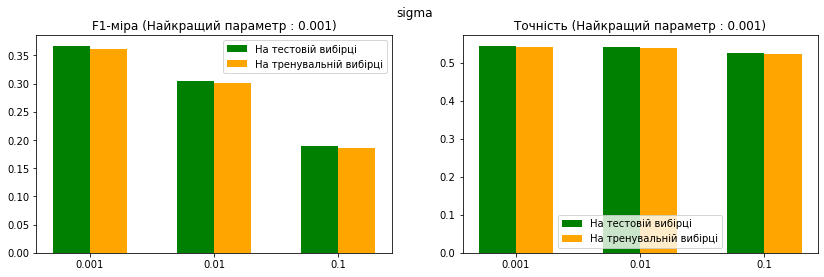

In [19]:
plot_graphics(results, "sigma")

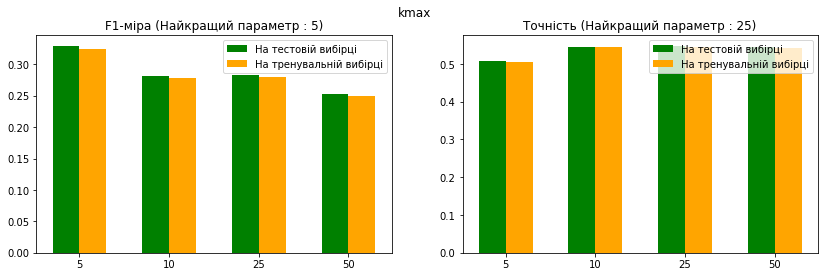

In [20]:
plot_graphics(results, "kmax")

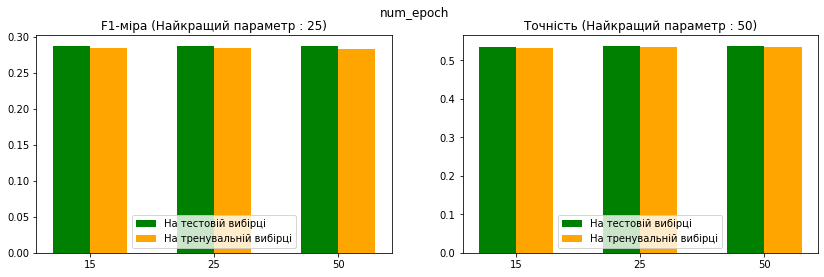

In [21]:
plot_graphics(results, "num_epoch")

In [22]:
results

,f1_train,f1_test,accuracy_train,accuracy_test,sigma,num_epoch,num_sets,kmax,mf,num_input_units,output_units
0,0.442739,0.459944,0.53425,0.5506,0.001,15,3,5,tri,10,2
1,0.000000,0.000798,0.49970,0.5002,0.001,15,3,5,gaussian,10,2
2,0.457488,0.479174,0.50700,0.5224,0.001,15,3,5,semicircle,10,2
3,0.186993,0.211561,0.49860,0.5096,0.001,15,3,10,tri,10,2
4,0.048855,0.042896,0.50595,0.5032,0.001,15,3,10,gaussian,10,2
...,...,...,...,...,...,...,...,...,...,...,...
319,0.400655,0.406697,0.60995,0.6158,0.100,50,7,25,gaussian,10,2
320,0.067750,0.070021,0.50065,0.5040,0.100,50,7,25,semicircle,10,2
321,0.187976,0.189205,0.52480,0.5270,0.100,50,7,50,tri,10,2
322,0.224599,0.238185,0.56945,0.5764,0.100,50,7,50,gaussian,10,2


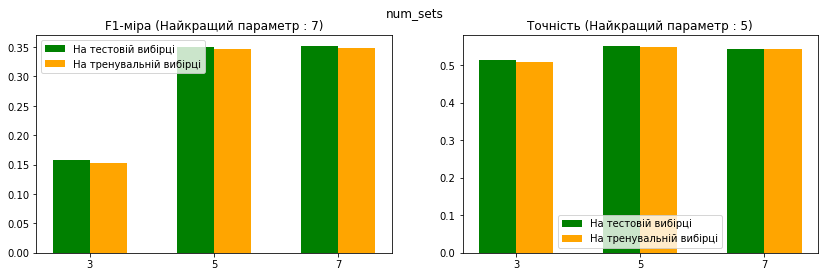

In [23]:
plot_graphics(results, "num_sets")

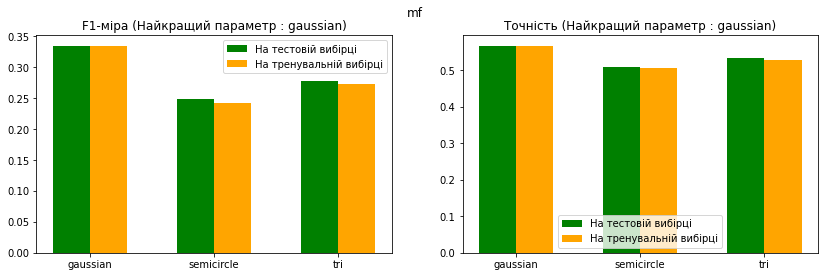

In [24]:
plot_graphics(results, "mf")

In [27]:
print(results.iloc[np.argmax(results["f1_test"])])

f1_train            0.54056
f1_test            0.535315
accuracy_train        0.655
accuracy_test        0.6536
sigma                 0.001
num_epoch                15
num_sets                  5
kmax                     10
mf                 gaussian
num_input_units          10
output_units              2
Name: 16, dtype: object


In [28]:
print(results.iloc[np.argmax(results["accuracy_test"])])

f1_train           0.527619
f1_test            0.533882
accuracy_train       0.6652
accuracy_test         0.669
sigma                 0.001
num_epoch                15
num_sets                  5
kmax                     50
mf                 gaussian
num_input_units          10
output_units              2
Name: 22, dtype: object
